In [1]:
import glucifer
import underworld as uw
from underworld import function as fn
import math
import numpy as np
from planetengine.utilities import quickShow

In [2]:
ratio = 1. / 3.
aspect = 2.
res = 4

length = 1.
outerRad = length / (1. - min(0.99999, max(0.00001, ratio)))
radii = (outerRad - length, outerRad)
width = length**2 * aspect * 2. / (radii[1]**2 - radii[0]**2)
midpoint = math.pi / 2.
angExtentRaw = (midpoint - 0.5 * width, midpoint + 0.5 * width)
angularExtent = [item * 180. / math.pi for item in angExtentRaw]
angLen = angExtentRaw[1] - angExtentRaw[0]
radRes = res
angRes = 4 * int(angLen * (int(radRes * radii[1] / length)) / 4.)
elementRes = (radRes, angRes)

In [3]:
mesh = uw.mesh.FeMesh_Annulus(
    elementRes = elementRes,
    radialLengths = radii,
    angularExtent = angularExtent,
    periodic = [False, False]
    )


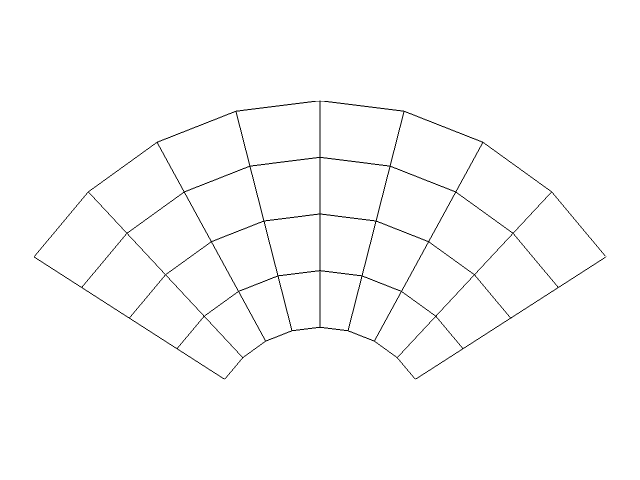

In [4]:
quickShow(mesh)

In [5]:
maskVar = uw.mesh.MeshVariable(mesh, nodeDofCount = 1)
weightVar = uw.mesh.MeshVariable(mesh, nodeDofCount = 1)
def setMask(maskVar, index):
    maskVar.data[:] = 0.
    maskVar.data[index] = 1.
localIntegral = uw.utils.Integral(maskVar, mesh)
for index, val in enumerate(weightVar.data):
    setMask(maskVar, index)
    weightVar.data[index] = localIntegral.evaluate()[0]


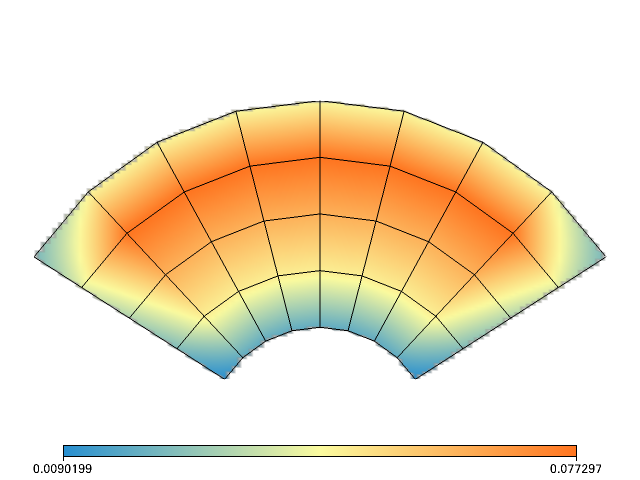

In [6]:
quickShow(weightVar, mesh)

In [ ]:
uw.utils.Integral(1., mesh).evaluate()[0] / weightVar.data.sum()

In [ ]:
intMeshSurf = uw.utils.Integral(
    1.,
    mesh,
    integrationType = 'surface',
    surfaceIndexSet = mesh.specialSets["outer"]
    )
intMeshSurf.evaluate()[0]

In [ ]:
outerNodes = mesh.specialSets['outer'].data
np.sqrt(np.take(weightVar.data, outerNodes)).sum() * 2.

In [ ]:
maskVar = uw.mesh.MeshVariable(mesh, nodeDofCount = 1)
weightVar = uw.mesh.MeshVariable(mesh, nodeDofCount = 1)
def setMask(maskVar, index):
    maskVar.data[:] = 0.
    maskVar.data[index] = 1.
localIntegral = uw.utils.Integral(
    maskVar,
    mesh,
    integrationType = 'surface',
    surfaceIndexSet = mesh.specialSets["outer"]
    )
for index, val in enumerate(weightVar.data):
    setMask(maskVar, index)
    weightVar.data[index] = localIntegral.evaluate()[0]

In [ ]:
np.take(weightVar.data, outerNodes)